# COVID-19 Vaccines Sentiment Analysis
------------------

For this notebook, we will be doing a sentiment analysis for COVID-19 vaccines using data from COVID-19 All Vaccines Tweets, collected using tweepy Python package to access Twitter API. For each of the vaccine I use relevant search term (most frequently used in Twitter to refer to the respective vaccine).

Before we start, we will be importing the necessary libraries for our analysis. 

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px

sns.set(style="darkgrid")

## Importing the Dataset

Now we will be importing the dataset from the COVID-19 All Vaccines Tweets. 

In [21]:
df = pd.read_csv("cleaned_tweets_2020.10.csv")
df.head()

,Datetime,Text,Location,tweet
0,2020-10-30 23:59:52+00:00,1/2 This is what I said way back in March. Gla...,Treaty 7 Land,This is what I said way back in March Gla...
1,2020-10-30 23:59:38+00:00,@KCBlues_ @hann4hlew We wait until the vaccine...,"Stratford-Upon-Avon, England",KCBlues hann hlew We wait until the vaccine...
2,2020-10-30 23:59:38+00:00,"Everyone we talk to are not discussing COVID, ...",NaN,Everyone we talk to are not discussing COVID ...
3,2020-10-30 23:59:04+00:00,Considering Emotion in COVID-19 Vaccine Commun...,"Fayetteville, AR",Considering Emotion in COVID Vaccine Commun...
4,2020-10-30 23:58:52+00:00,@realDonaldTrump Did we shut down the entire c...,NaN,realDonaldTrump Did we shut down the entire c...


Now that we have imported the dataset, we will check the shape of our dataset, to view the number of rows and column.

In [22]:
df.shape

(30030, 4)

We can see that our dataset have 189,054 rows and 16 columns. But since we would not need all the columns, we will now select the important ones for our analysis, and create a new dataframe. 

Now that we have a new dataset with the important data for our analysis, we need to check the data types of the dataframe. 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30030 entries, 0 to 30029
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  30030 non-null  object
 1   Text      30030 non-null  object
 2   Location  21272 non-null  object
 3   tweet     30030 non-null  object
dtypes: object(4)
memory usage: 938.6+ KB


We can see that all three of our columns have the same data types. But for the date column, we can see that it is specific to the second of the tweet. Since we wouldn't need such an accurate data for our analysis, we will only take the day, month, and year of the tweet. 

In [24]:
df.Datetime = pd.to_datetime(df.Datetime).dt.date
df

,Datetime,Text,Location,tweet
0,2020-10-30,1/2 This is what I said way back in March. Gla...,Treaty 7 Land,This is what I said way back in March Gla...
1,2020-10-30,@KCBlues_ @hann4hlew We wait until the vaccine...,"Stratford-Upon-Avon, England",KCBlues hann hlew We wait until the vaccine...
2,2020-10-30,"Everyone we talk to are not discussing COVID, ...",NaN,Everyone we talk to are not discussing COVID ...
3,2020-10-30,Considering Emotion in COVID-19 Vaccine Commun...,"Fayetteville, AR",Considering Emotion in COVID Vaccine Commun...
4,2020-10-30,@realDonaldTrump Did we shut down the entire c...,NaN,realDonaldTrump Did we shut down the entire c...
...,...,...,...,...
30025,2020-10-01,FDA expands probe into safety of AstraZeneca's...,NaN,FDA expands probe into safety of AstraZeneca s...
30026,2020-10-01,Small and large models compared to human COVID...,"Cincinnati, OH",Small and large models compared to human COVID...
30027,2020-10-01,Many unexpected loss during covid. Hope this O...,"Ahmedabad, India",Many unexpected loss during covid Hope this O...
30028,2020-10-01,Covid: Vaccine will 'not return life to normal...,Global,Covid Vaccine will not return life to normal...


Now that we have finished importing our dataset, we can continue to process our data for analysis. 

## Processing the Data

For processing our data, we will need to select the text column of our dataset. 

In [25]:
texts = df['tweet']
texts.head()

0        This is what I said way back in March  Gla...
1     KCBlues   hann hlew We wait until the vaccine...
2    Everyone we talk to are not discussing COVID  ...
3    Considering Emotion in COVID    Vaccine Commun...
4     realDonaldTrump Did we shut down the entire c...
Name: tweet, dtype: object

The first step of our processing would be removing the url from all the tweets, since we don't need them. after that, we will be converting all of the text into lower cases for easier analysis. Lastly, we will also remove all punctuations from the texts. 

In [26]:
remove_url = lambda x: re.sub(r'https\S+', '', str(x))
texts_lr = texts.apply(remove_url)
texts_lr.head()

0        This is what I said way back in March  Gla...
1     KCBlues   hann hlew We wait until the vaccine...
2    Everyone we talk to are not discussing COVID  ...
3    Considering Emotion in COVID    Vaccine Commun...
4     realDonaldTrump Did we shut down the entire c...
Name: tweet, dtype: object

In [27]:
to_lower = lambda x : x.lower()
texts_lc = texts_lr.apply(to_lower)
texts_lc.head()

0        this is what i said way back in march  gla...
1     kcblues   hann hlew we wait until the vaccine...
2    everyone we talk to are not discussing covid  ...
3    considering emotion in covid    vaccine commun...
4     realdonaldtrump did we shut down the entire c...
Name: tweet, dtype: object

In [28]:
rmv_pcs = lambda x : x.translate(str.maketrans('', '', string.punctuation))
texts_pcs = texts_lc.apply(rmv_pcs)
texts_pcs

0            this is what i said way back in march  gla...
1         kcblues   hann hlew we wait until the vaccine...
2        everyone we talk to are not discussing covid  ...
3        considering emotion in covid    vaccine commun...
4         realdonaldtrump did we shut down the entire c...
                               ...                        
30025    fda expands probe into safety of astrazeneca s...
30026    small and large models compared to human covid...
30027    many unexpected loss during covid  hope this o...
30028    covid  vaccine will  not return life to normal...
30029    siue s butler sole pharmacist serving on natio...
Name: tweet, Length: 30030, dtype: object

Now that we have remove all the unnecessary characters from our text, we will now remove the stopwords from the text. A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query. This will reduce the noise in our analysis. 

In [29]:
update_words = ['covid','amp', 'coronavirus', 'covid19','https']
stop_words = set(stopwords.words('english'))
stop_words.update(update_words)

remove_words = lambda x : ' '.join([word for word in x.split() if word not in stop_words])
texts_rs = texts_pcs.apply(remove_words)
texts_rs.head()

0    said way back march glad see research gaining ...
1    kcblues hann hlew wait vaccine solution come l...
2    everyone talk discussing discussing economy po...
3    considering emotion vaccine communication addr...
4    realdonaldtrump shut entire country flatten cu...
Name: tweet, dtype: object

## Text Analysis

Before we analyze the sentiments of the tweets, we will be doing an analysis on the text itself. First, we will be listing all of the words on each of the tweets, and also visualizing it. The purpose is to see the most common words from all of the tweets. 

In [30]:
word_list = [word for line in texts_rs for word in line.split()]
word_list[:10]

['said',
 'way',
 'back',
 'march',
 'glad',
 'see',
 'research',
 'gaining',
 'momentum',
 'effective']

In [31]:
word_counts = Counter(word_list).most_common(50)
words_df = pd.DataFrame(word_counts)
words_df.columns = ['word', 'frequency']

px.bar(words_df, x='word', y='frequency', title='Most Common Words')

## Join Table

Since we are done with the processing of the text data, we can now put the cleaned text into our main dataframe.

In [32]:
df['text'] = texts_rs
df.head()

,Datetime,Text,Location,tweet,text
0,2020-10-30,1/2 This is what I said way back in March. Gla...,Treaty 7 Land,This is what I said way back in March Gla...,said way back march glad see research gaining ...
1,2020-10-30,@KCBlues_ @hann4hlew We wait until the vaccine...,"Stratford-Upon-Avon, England",KCBlues hann hlew We wait until the vaccine...,kcblues hann hlew wait vaccine solution come l...
2,2020-10-30,"Everyone we talk to are not discussing COVID, ...",NaN,Everyone we talk to are not discussing COVID ...,everyone talk discussing discussing economy po...
3,2020-10-30,Considering Emotion in COVID-19 Vaccine Commun...,"Fayetteville, AR",Considering Emotion in COVID Vaccine Commun...,considering emotion vaccine communication addr...
4,2020-10-30,@realDonaldTrump Did we shut down the entire c...,NaN,realDonaldTrump Did we shut down the entire c...,realdonaldtrump shut entire country flatten cu...


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30030 entries, 0 to 30029
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  30030 non-null  object
 1   Text      30030 non-null  object
 2   Location  21272 non-null  object
 3   tweet     30030 non-null  object
 4   text      30030 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


Now we see that the date here is still in string type. For our analysis, we need to convert it into datetime data type. Also, to limit  our analysis, we will only be taking tweets from march 1st, 2021. 

## Sentiment Analysis 

Now that we have finished preparing the data for our analysis, we can continue to with our sentiment analysis. Sentiment Analysis can be organized into neutral, positive, or negative sentiment. To find out, we will be using SentimentIntensityAnalyzer, which will rate whether the tweet containt positive, negative, or neutral sentiment. 

In [34]:
sid = SentimentIntensityAnalyzer()
ps = lambda x : sid.polarity_scores(x)
sentiment_scores = df.text.apply(ps)
sentiment_scores

0        {'neg': 0.0, 'neu': 0.592, 'pos': 0.408, 'comp...
1        {'neg': 0.134, 'neu': 0.788, 'pos': 0.079, 'co...
2        {'neg': 0.102, 'neu': 0.779, 'pos': 0.119, 'co...
3        {'neg': 0.204, 'neu': 0.639, 'pos': 0.157, 'co...
4        {'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...
                               ...                        
30025    {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...
30026    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
30027    {'neg': 0.13, 'neu': 0.339, 'pos': 0.531, 'com...
30028    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
30029    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: text, Length: 30030, dtype: object

In [35]:
sentiment_df = pd.DataFrame(data = list(sentiment_scores))
sentiment_df.head()

,neg,neu,pos,compound
0,0.000,0.592,0.408,0.9201
1,0.134,0.788,0.079,-0.3818
2,0.102,0.779,0.119,0.1027
3,0.204,0.639,0.157,-0.1280
4,0.000,0.891,0.109,0.4019


We can see that there is neg for negative sentiment, neu for neutral sentiment, pos for positive sentiment, and compound as the average rate of the sentiment. We will focused on the compound. 

For negative sentiment, the compound score will be closer to -1, and the opposite goes for the positive sentiment, which will be closer to 1. Neutral sentiment will be a 0. 

For our analysis, we will create another column called label, where we will be labelling the scores based on the compound polarity value. 

In [36]:
labelize = lambda x : 'neutral' if x==0 else('positive' if x>0 else 'negative')
sentiment_df['label'] = sentiment_df.compound.apply(labelize)
sentiment_df.head()

,neg,neu,pos,compound,label
0,0.000,0.592,0.408,0.9201,positive
1,0.134,0.788,0.079,-0.3818,negative
2,0.102,0.779,0.119,0.1027,positive
3,0.204,0.639,0.157,-0.1280,negative
4,0.000,0.891,0.109,0.4019,positive


Now that we have the label for each tweet, we will join the label column into our main dataframe. Once we have joined the two tables, we will be counting the number of positive, negative, and neutral tweets from our dataframe and visualize it. 

In [37]:
data = df.join(sentiment_df.label)
data.head()

,Datetime,Text,Location,tweet,text,label
0,2020-10-30,1/2 This is what I said way back in March. Gla...,Treaty 7 Land,This is what I said way back in March Gla...,said way back march glad see research gaining ...,positive
1,2020-10-30,@KCBlues_ @hann4hlew We wait until the vaccine...,"Stratford-Upon-Avon, England",KCBlues hann hlew We wait until the vaccine...,kcblues hann hlew wait vaccine solution come l...,negative
2,2020-10-30,"Everyone we talk to are not discussing COVID, ...",NaN,Everyone we talk to are not discussing COVID ...,everyone talk discussing discussing economy po...,positive
3,2020-10-30,Considering Emotion in COVID-19 Vaccine Commun...,"Fayetteville, AR",Considering Emotion in COVID Vaccine Commun...,considering emotion vaccine communication addr...,negative
4,2020-10-30,@realDonaldTrump Did we shut down the entire c...,NaN,realDonaldTrump Did we shut down the entire c...,realdonaldtrump shut entire country flatten cu...,positive


In [38]:
counts_df = data.label.value_counts().reset_index()
counts_df

,index,label
0,positive,13401
1,negative,9380
2,neutral,7249


<AxesSubplot:xlabel='index', ylabel='label'>

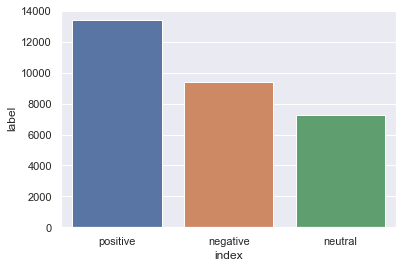

In [39]:
sns.barplot(data=counts_df, x='index', y='label')

We can see that mostly, the tweets about the vaccines is neutral, and with more positive than negative. But the visualization that we see is from the total tweets from march to september 2021. 

For closer analyzation, we will see the number of positive, negative, and neutral tweets dialy from march 2021. 

In [40]:
data.to_csv('sentiment_oct.csv',index=False)